<a href="https://colab.research.google.com/github/GuinaWeng/ML-project/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications import VGG16
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
#Preparing Data and data lables
trainDF = pd.read_csv('train.anno.txt', delim_whitespace=True, header=None)
testDF = pd.read_csv('test.anno.txt', delim_whitespace=True, header=None, skiprows=[0])
classes = np.array(['Indoor', 'Outdoor', 'Person', 'Day', 'Night', 'Water', 'Road', 
                  'Vegetation', 'Tree', 'Mountains', 'Beach', 'Buildings', 'Sky', 
                  'Sunny','Partly_Cloudy', 'Overcast', 'Animal'])

In [10]:
#Preparing Training Data
train_image = []
for i in tqdm(range(trainDF.shape[0])):
    img = image.load_img('train/'+trainDF[0][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)

Y_train = np.array(trainDF.drop([0],axis=1))
print('Size of training data:', X_train.shape, '\n') 

100%|██████████| 1827/1827 [00:07<00:00, 245.00it/s]


Size of training data: (1827, 224, 224, 3) 



In [14]:
#Preparing Testing Data
test_image = []
for i in tqdm(range(testDF.shape[0])):
    img = image.load_img('test/'+testDF[0][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)

Y_test = np.array(testDF.drop([0],axis=1))
print('Size of test data:', X_test.shape, '\n') 

100%|██████████| 1000/1000 [00:05<00:00, 197.91it/s]


Size of test data: (1000, 224, 224, 3) 



In [164]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [167]:
#Evaluaing Model
model.fit(X_train, Y_train, epochs=30, validation_split=0.3, batch_size=64)

Epoch 1/30
20/20 [==============================] - 2s 114ms/step - loss: 0.2473 - accuracy: 0.8615 - val_loss: 0.4963 - val_accuracy: 0.8270
Epoch 2/30
20/20 [==============================] - 2s 112ms/step - loss: 0.2452 - accuracy: 0.8404 - val_loss: 0.4621 - val_accuracy: 0.8452
Epoch 3/30
20/20 [==============================] - 2s 110ms/step - loss: 0.2508 - accuracy: 0.8396 - val_loss: 0.5129 - val_accuracy: 0.8488
Epoch 4/30
20/20 [==============================] - 2s 111ms/step - loss: 0.2469 - accuracy: 0.8404 - val_loss: 0.4855 - val_accuracy: 0.8470
Epoch 5/30
20/20 [==============================] - 2s 112ms/step - loss: 0.2416 - accuracy: 0.8412 - val_loss: 0.4901 - val_accuracy: 0.8379
Epoch 6/30
20/20 [==============================] - 2s 111ms/step - loss: 0.2382 - accuracy: 0.8263 - val_loss: 0.4880 - val_accuracy: 0.8561
Epoch 7/30
20/20 [==============================] - 2s 111ms/step - loss: 0.2408 - accuracy: 0.8443 - val_loss: 0.4940 - val_accuracy: 0.8306
Epoch 

In [168]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
16/16 [==============================] - 1s 33ms/step - loss: 0.4805 - accuracy: 0.8520
test loss, test acc: [0.480476438999176, 0.8519999980926514]


In [169]:
pred = model.predict(X_test)
pred_rnd = pred.round()
metric = keras.metrics.Accuracy()
metric.update_state(Y_test,pred_rnd)
metric.result().numpy()

0.8297059

In [170]:
def tags_prediction(image_name):
  img1 = image.load_img('test/'+image_name,target_size=(224,224,3))
  img1 = image.img_to_array(img1)
  img1 = img1/255
  plt.imshow(img1)

  #Predicting values for image we have given as input
  prediction = model.predict(img1.reshape(1,224,224,3))
  values = prediction.round()
  
  # collect all predicted tags
  tags = [classes[i] for i in range(len(classes)) if values[0][i] == 1.0]
  return tags

['Outdoor', 'Person', 'Day', 'Vegetation']

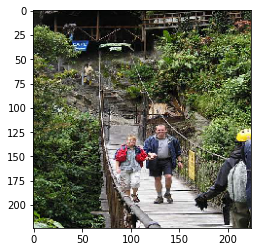

In [181]:
tags_prediction(str(testDF[0][14]))

['Outdoor', 'Person', 'Day', 'Vegetation', 'Tree', 'Sky', 'Sunny']

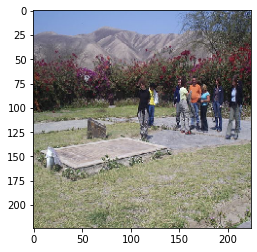

In [184]:
tags_prediction(str(testDF[0][144]))

['Outdoor', 'Person', 'Day', 'Road', 'Vegetation', 'Tree', 'Buildings', 'Sky']

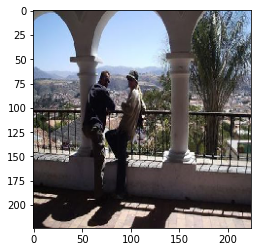

In [189]:
tags_prediction(str(testDF[0][300]))

['Outdoor', 'Day', 'Vegetation', 'Tree', 'Buildings', 'Sky']

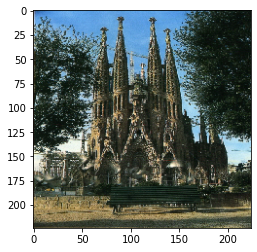

In [196]:
tags_prediction(str(testDF[0][923]))

['Outdoor', 'Person', 'Day', 'Water', 'Sky']

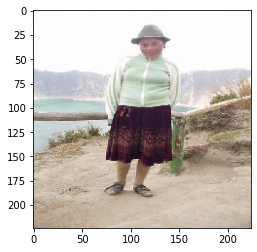

In [202]:
tags_prediction(str(testDF[0][10]))

['Indoor', 'Person']

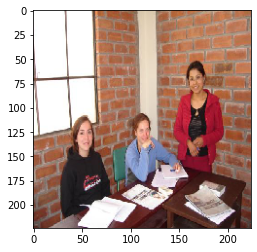

In [204]:
tags_prediction(str(testDF[0][8]))

['Outdoor', 'Person', 'Day', 'Buildings', 'Sky']

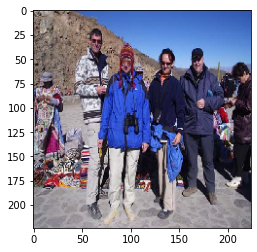

In [212]:
tags_prediction(str(testDF[0][26])). #Model give some wrong prediction too as it is only 85% accurate